In [6]:
from link_generation.potholders.utils import *
import torch
import matplotlib.pyplot as plt

In [ ]:
potholder_size = 7
state = torch.randint(low=0, high=2, size=(100000,potholder_size**2 - 2), dtype=torch.float32).to('cpu')
P = state_to_potholder_pytorch(state)
G = potholder_to_goeritz_pytorch(P)
sig, log_det = goeritz_to_invariants(G)
invariants = torch.cat([sig.unsqueeze(1),log_det.unsqueeze(1)], dim=1)

In [8]:
random_idx = torch.randint(low=0, high=len(invariants), size=(100000,2))
dist = torch.abs(invariants[random_idx[:,0]] - invariants[random_idx[:,1]])
torch.mean(dist,dim=0)

tensor([3.5303, 2.8284])

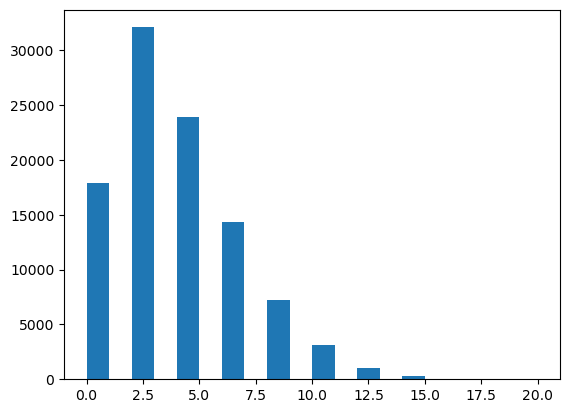

In [ ]:
plt.hist(dist[:,0], bins=20)
plt.show() # signature

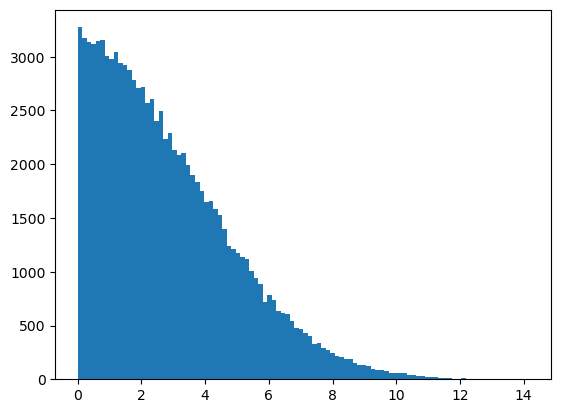

In [ ]:
plt.hist(dist[:,1], bins=100)
plt.show() # log det 